In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In [2]:
b = phoebe.default_binary()

In [3]:
b.add_constraint('semidetached', 'primary')

<ParameterSet: 1 parameters>

In [4]:
b.add_constraint('semidetached', 'secondary')

<ParameterSet: 1 parameters>

In [5]:
b['period@orbit'] = 1
b['sma@orbit'] = 6
#b['q@binary'] = 0.44
# b['incl@orbit'] = 83.5
# b['requiv@primary'] = 1.2
# b['requiv@secondary'] = 0.8
#b['teff@primary'] = 5660.
# b['teff@secondary'] = 5500.

In [6]:
lc = np.loadtxt('data.lc')

In [7]:
b.add_dataset('lc', times=lc[:,0], fluxes=lc[:,1], sigmas=0.05*np.ones(len(lc)))

<ParameterSet: 78 parameters | contexts: figure, compute, constraint, dataset>

In [8]:
phoebe.interactive_checks_off()
phoebe.interactive_constraints_off()
b.set_value_all('irrad_method', 'none')

In [9]:
b.flip_constraint('compute_phases', 'compute_times')
b['compute_phases@lc@dataset'] = np.linspace(-0.5,0.5,21)

In [10]:
def lnprob(x, adjpars, priors):
    #Check to see that all values are within the allowed limits:
    if not np.all([priors[i][0] < x[i] < priors[i][1] for i in range(len(priors))]):
         return -np.inf

    for i in range(len(adjpars)):
        b[adjpars[i]] = x[i]
    
    # Let's assume that our priors are uniform on the range of the physical parameter combinations.
    # This is already handled in Phoebe, which will throw an error if the system is not physical,
    # therefore it's easy to implement the lnprior as =0 when system checks pass and =-inf if they don't.
    # Here we'll 'package' this in a simple try/except statement:
    
    try:
        b.run_compute(irrad_method='none')

        # sum of squares of the residuals
        fluxes_model = b['fluxes@model'].interp_value(times=lc[:,0])
        lnp = -0.5*np.sum((fluxes_model-b['value@fluxes@dataset'])**2 / b['value@sigmas@dataset']**2) 

    except:
        lnp = -np.inf

    sys.stderr.write("lnp = %e\n" % (lnp))

    return lnp

In [11]:
from scipy.stats import norm
def run(adjpars, priors, nwalkers, niter):
    ndim = len(adjpars)

   

    p0 = np.array([[p[0] + (p[1]-p[0])*np.random.rand() for p in priors] for i in range(nwalkers)])

#     pool = MPIPool()
#     if not pool.is_master():
#         pool.wait()
#         sys.exit(0)

    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[adjpars, priors])

    pos, prob, state = sampler.run_mcmc(p0, niter)
    
    print(p0)
    
    for i in range(ndim):
        plt.figure()
        y = sampler.flatchain[:,i]
        n, bins, patches = plt.hist(y, 200, density=1, color="b", alpha=0.45)
        plt.title("Dimension {0:d}".format(i))
        
        mu = np.average(y)
        sigma = np.std(y)       
        print ("mu,", "sigma = ", mu, sigma)

        bf = norm.pdf(bins, mu, sigma)
        l = plt.plot(bins, bf, 'k--', linewidth=2.0)

    #plt.show()
    
    return pos

#     pool.close()



100%|██████████| 21/21 [00:00<00:00, 26.99it/s]
lnp = -8.975882e+02
100%|██████████| 21/21 [00:00<00:00, 28.05it/s]
lnp = -2.853522e+01
100%|██████████| 21/21 [00:00<00:00, 27.15it/s]
lnp = -4.479778e+02
100%|██████████| 21/21 [00:00<00:00, 28.84it/s]
lnp = -4.265858e+01
100%|██████████| 21/21 [00:00<00:00, 27.02it/s]
lnp = -1.982020e+03
100%|██████████| 21/21 [00:00<00:00, 28.29it/s]
lnp = -8.747508e+02
100%|██████████| 21/21 [00:00<00:00, 28.55it/s]
lnp = -1.102284e+02
100%|██████████| 21/21 [00:02<00:00,  9.43it/s]
lnp = -1.463529e+03
100%|██████████| 21/21 [00:02<00:00,  9.43it/s]
lnp = -5.616061e+01
100%|██████████| 21/21 [00:00<00:00, 29.29it/s]
lnp = -1.792716e+03
lnp = -inf
100%|██████████| 21/21 [00:00<00:00, 29.33it/s]
lnp = -2.562764e+03
100%|██████████| 21/21 [00:00<00:00, 30.99it/s]
lnp = -6.081377e+03
100%|██████████| 21/21 [00:00<00:00, 28.27it/s]
lnp = -5.316535e+01
100%|██████████| 21/21 [00:00<00:00, 26.69it/s]
lnp = -6.202229e+03
100%|██████████| 21/21 [00:03<00:00, 

100%|██████████| 21/21 [00:00<00:00, 28.45it/s]
lnp = -1.217552e+02
100%|██████████| 21/21 [00:02<00:00,  9.39it/s]
lnp = -7.741231e+01
100%|██████████| 21/21 [00:00<00:00, 27.27it/s]
lnp = -2.071757e+01
100%|██████████| 21/21 [00:02<00:00,  9.36it/s]
lnp = -2.963625e+01
100%|██████████| 21/21 [00:00<00:00, 27.11it/s]
lnp = -3.466527e+01
100%|██████████| 21/21 [00:00<00:00, 28.85it/s]
lnp = -2.082230e+03
100%|██████████| 21/21 [00:00<00:00, 28.10it/s]
lnp = -1.644905e+03
100%|██████████| 21/21 [00:00<00:00, 27.53it/s]
lnp = -5.301570e+02
100%|██████████| 21/21 [00:02<00:00,  9.35it/s]
lnp = -7.506914e+02
100%|██████████| 21/21 [00:00<00:00, 28.04it/s]
lnp = -1.750636e+03
100%|██████████| 21/21 [00:00<00:00, 26.91it/s]
lnp = -4.570577e+03
100%|██████████| 21/21 [00:02<00:00,  9.48it/s]
lnp = -3.998810e+02
100%|██████████| 21/21 [00:02<00:00,  9.46it/s]
lnp = -3.503174e+01
100%|██████████| 21/21 [00:02<00:00,  9.29it/s]
lnp = -7.711338e+02
100%|██████████| 21/21 [00:03<00:00,  6.67it/s]


[[7.57482468e+01 7.77926646e-01 5.71988446e+03 5.47473228e+03]
 [8.23170603e+01 4.30074887e-01 5.43929722e+03 5.55202669e+03]
 [7.63071072e+01 4.98519392e-01 5.63306283e+03 5.76937151e+03]
 [7.92740105e+01 3.28227753e-01 5.48271531e+03 5.72573368e+03]
 [8.12840342e+01 8.32503073e-01 5.53180157e+03 5.43193073e+03]
 [7.94113664e+01 6.98516662e-01 5.78584014e+03 5.68750079e+03]
 [7.87124459e+01 3.67267467e-01 5.46195039e+03 5.48900409e+03]
 [8.22903993e+01 2.68920481e-01 5.76443158e+03 5.45883162e+03]
 [8.29927993e+01 5.04051003e-01 5.47034404e+03 5.45266819e+03]
 [8.29622102e+01 1.77599683e-01 5.58069068e+03 5.59627751e+03]
 [8.37177311e+01 8.53285620e-01 5.43972260e+03 5.51426972e+03]
 [7.99350121e+01 1.15544243e-01 5.50930700e+03 5.60788060e+03]
 [8.14230659e+01 1.64426062e-02 5.60984505e+03 5.51690246e+03]
 [8.04239987e+01 5.88032340e-01 5.75157792e+03 5.41869986e+03]
 [7.66802757e+01 8.87169785e-01 5.63885623e+03 5.72621641e+03]
 [8.29977825e+01 8.20143213e-01 5.50814901e+03 5.586723

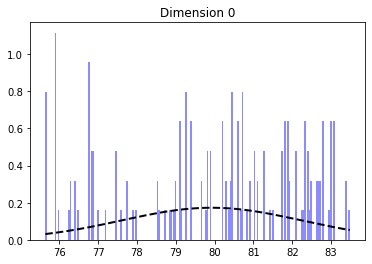

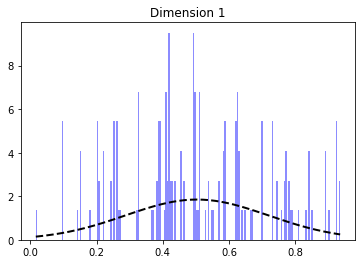

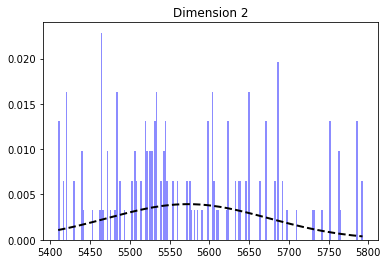

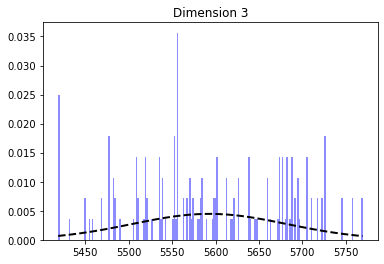

In [12]:
adjpars = ['incl@orbit', 'q@binary', 'teff@primary', 'teff@secondary']
priors = [(75.0, 84.0), (0, 1), (5400, 5800), (5400., 5800.)]
nwalkers = 32
niters = 5
state = None

import time

time1 = time.time()
postion = run(adjpars, priors, nwalkers, niters)
time2 = time.time()

In [ ]:
from matplotlib.pyplot import cm 

mod = b
position = postion
times = lc[:,0]
color=cm.rainbow(np.linspace(0,1,nwalkers))

for i,c in zip(range(nwalkers),color):
    
    mod['incl@binary@orbit@component'] = position[-1-i,0]
    mod['q@binary'] = position[-1-i,1]
    mod['teff@primary'] = position[-1-i,2]
    mod['teff@secondary'] = position[-1-i,3]
    mod.run_compute(model='run{}'.format(i))


for i,c in zip(range(nwalkers),color):
    model = mod['fluxes@run{}'.format(i)].interp_value(times=times)

    #plt.figure(1)
    plt.plot(times,model,c=c)
plt.plot(times,lc[:,1],"k.")
plt.xlabel("Times")
plt.ylabel("Flux")


 10%|▉         | 2/21 [00:00<00:01, 17.10it/s]